In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.optimize import curve_fit

In [2]:
#En linux
listado = open("/home/horthp/Documentos/asas_data/all_data/test","r")
#En windows
#listado = open("C:\\Users\\horth_000\\Desktop\\asas_data\\all_data\\test","r")
files = listado.readlines()
listado.close()
files[533].strip("\n")

'005606-5810.0'

In [3]:
#En linux
archivo = open("/home/horthp/Documentos/asas_data/all_data/"+files[233].strip("\n"),"r")
#archivo = open("/home/horthp/Documentos/asas_data/091830-2041.9.txt","r")
#En windows
#archivo = open("C:\\Users\\horth_000\\Desktop\\asas_data\\all_data\\"+files[233].strip("\n"),"r")
#133,233 tiene indices distintos

In [4]:
text = archivo.readlines()
archivo.close()

### Funciones necesarias para ordenar la data

In [5]:
def cut(c):
    flag = True
    data = []
    head = []
    patron = re.compile("\s+")
    for i in c:
        if flag == True:
            head.append(patron.split(i))
            flag = False
        else:
            data.append(patron.split(i))
    return np.array(data),head

In [10]:
def parser(data):
    c = []
    alpha = []
    gamma = []
    flag = 0
    for i in range(len(data)):
        head = re.findall("\A#\s+(.+)",data[i])
        new_line = re.findall("\A   (.+)",data[i]) 
        ra = re.findall("\#ra=\s+(.+)",data[i])
        dec = re.findall("\#dec=\s+(.+)",data[i])
        #ndataset = re.findall("\#dataset=(.+)",linea)
        if ra:
            ra_aux = ra
        if dec:
            dec_aux = dec
        if head:
            [c.append(j) for j in head]
        if new_line:
            [c.append(k) for k in new_line]
            alpha.append(ra_aux)
            gamma.append(dec_aux)
            try:
                next_line = re.findall("\A   (.+)",data[i+1])
                if not next_line:
                    reg, col= cut(c)
                    if flag == 0:
                        #df = pd.DataFrame(cc[1:][:],columns=cc[0])
                        df = pd.DataFrame(reg,columns=col)
                        df["RA"] = np.array(alpha)
                        df["DEC"] = np.array(gamma)
                        c = []
                        alpha = []
                        gamma = []
                        flag += 1                    
                    else:
                        #df_aux = pd.DataFrame(cc[1:][:],columns=cc[0])
                        df_aux = pd.DataFrame(reg,columns=col)
                        df_aux["RA"] = np.array(alpha)
                        df_aux["DEC"] = np.array(gamma)
                        df = pd.concat([df,df_aux],ignore_index=True)
                        c = []
                        alpha = []
                        gamma = []
            except:
                reg, col = cut(c)
                #df_aux = pd.DataFrame(cc[1:][:],columns=cc[0])
                df_aux = pd.DataFrame(reg,columns=col)
                df_aux["RA"] = np.array(alpha)
                df_aux["DEC"] = np.array(gamma)
                df = pd.concat([df,df_aux],ignore_index=True)
    
    col[0].remove('GRADE')
    df[col[0]] = df[col[0]].astype(float)
    
    return df

dataset = parser(text)


In [7]:
dataset.head()

,DEC,FRAME,GRADE,HJD,MAG_0,MAG_1,MAG_2,MAG_3,MAG_4,MER_0,MER_1,MER_2,MER_3,MER_4,RA
0,-75.973090 -75:58:23.1,194.0,B,1869.52260,11.682,11.657,11.602,11.501,11.411,0.065,0.033,0.028,0.030,0.031,0.404214 00:24:15.2
1,-75.973090 -75:58:23.1,504.0,A,1871.59815,11.648,11.621,11.570,11.467,11.372,0.042,0.026,0.024,0.026,0.028,0.404214 00:24:15.2
2,-75.973090 -75:58:23.1,819.0,A,1873.57977,11.709,11.638,11.563,11.468,11.376,0.059,0.027,0.023,0.026,0.029,0.404214 00:24:15.2
3,-75.973090 -75:58:23.1,1135.0,B,1875.56527,11.649,11.646,11.591,11.489,11.416,0.064,0.030,0.026,0.028,0.030,0.404214 00:24:15.2
4,-75.973090 -75:58:23.1,1766.0,A,1879.55609,11.865,11.806,11.761,11.686,11.594,0.055,0.030,0.026,0.027,0.029,0.404214 00:24:15.2


In [9]:
dataset.describe()

,FRAME,HJD,MAG_0,MAG_1,MAG_2,MAG_3,MAG_4,MER_0,MER_1,MER_2,MER_3,MER_4
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,139573.584695,3419.888581,13.673749,13.610233,13.881942,13.748335,13.877791,0.049279,0.039434,0.036401,0.040619,0.045114
std,66568.720157,669.821551,8.777620,8.787108,10.524003,10.546055,11.566919,0.013081,0.009450,0.010731,0.012848,0.015257
min,194.000000,1869.522600,11.635000,11.604000,11.539000,11.366000,11.001000,0.027000,0.023000,0.020000,0.022000,0.021000
25%,107938.500000,3185.640142,12.158000,12.091750,11.971000,11.837250,11.729250,0.040000,0.034000,0.031000,0.034000,0.038000
50%,156332.500000,3607.779685,12.363000,12.293000,12.162500,12.016000,11.868500,0.047000,0.038000,0.034000,0.038000,0.042000
75%,156946.750000,3615.767102,12.528000,12.450750,12.313000,12.159000,11.995750,0.055000,0.042000,0.039000,0.043000,0.047000
max,265607.000000,4572.921320,99.999000,99.999000,99.999000,99.999000,99.999000,0.186000,0.094000,0.109000,0.135000,0.170000


In [66]:
len(dataset.index)

1346

### Manejo del dataset

In [67]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5)
    upper_bound = quartile_3 + (iqr*1.5)
    #print(iqr)
    #index_up = np.where(ys > upper_bound)
    #index_low = np.where(ys < lower_bound)
    #return index_up, index_low
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [68]:
outliers_index = outliers_iqr(dataset["MAG_2"].values)
#print("outlier",outliers_index[0])

In [70]:
def select_data(dataset):
    select = pd.unique(dataset["RA"].values.ravel())
    return select

def sub_dataset(dataset):
    length = []
    s = select_data(dataset)
    for i in s:
        length.append(len(dataset.loc[dataset[dataset.RA==i].RA.notnull().values.ravel()]))
    #print(length)
    #print(length.index(max(length)))
    max_item_index = length.index(max(length))
    return(dataset.loc[dataset[dataset.RA==s[max_item_index]].RA.notnull().values.ravel()])

subdata = sub_dataset(dataset)        
#a = dataset[dataset.RA==select[3]]
#aux = dataset.loc[(a.RA.notnull()).values.ravel()]

#aux = subdata
aux = dataset
len(aux.HJD.values)

1346

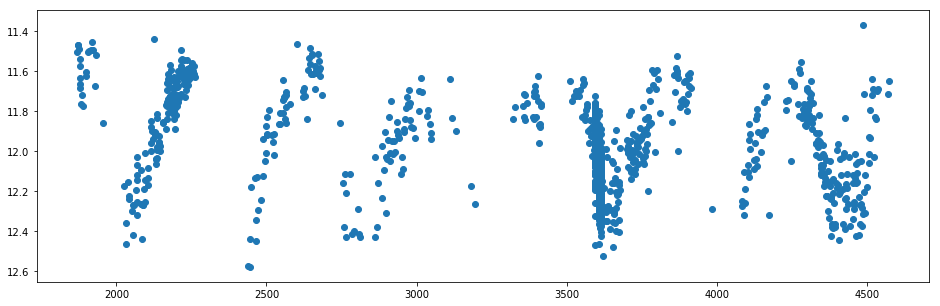

In [71]:
outliers_index = outliers_iqr(aux["MAG_3"].values)
values_aux = aux["MAG_3"].drop(aux.index[outliers_index[0]])
hjd_aux = aux["HJD"].drop(aux.index[outliers_index[0]])
plt.figure(figsize=(16,5))
plt.gca().invert_yaxis()
plt.scatter(hjd_aux.values,values_aux.values)
plt.show()

# Análisis de Series de tiempo

# Una serie de tiempo es una coleccion de datos reunidos a través del tiempo, y consta de cuatro componentes escenciales los cuales son:

* **Tendencia: ** Se puede definir como un cambio a largo plazo que se produce en la relación al nivel medio, o el cambio a largo plazo de la media. La tendencia se identifica con un movimiento suave de la serie a largo plazo.
* **Estacionalidad: ** Patron que se repite en periodos de tiempo cortos.
* **Fluctuacion ciclica: ** Con frecuencia las series de tiempo presentan secuencias alternas de puntos abajo y arriba de la línea de tendencia.
* **Aleatoriedad:** Esta componente no responde a ningún patrón de comportamiento, sino que es el resultado de factores fortuitos o aleatorios que inciden de forma aislada en una serie de tiempo.


In [72]:
y = values_aux.values.ravel()
x = hjd_aux.values.ravel()

maximo valor de HJD: 4572.92132
minimo valor de HJD: 1869.5226
Rango: 2703.39872
Rango/365: 7.40657183562
Largo del arreglo de magnitudes: 1282
lenY/r: 173.089524878
redondeo: 173.0


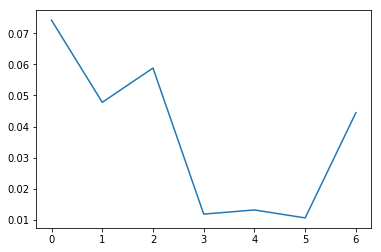

In [73]:
r = (max(x)- min(x))/365
l = len(y)/r
app =  np.rint(l)
print("maximo valor de HJD:",max(x))
print("minimo valor de HJD:",min(x))
print("Rango:", (max(x)- min(x)))
print("Rango/365:",r)
print("Largo del arreglo de magnitudes:",len(y))
print("lenY/r:",l)
print("redondeo:",app)

#print(len(y)/app)
k=1
m = []
prom = []
var = []
for i in range(len(y)):
    m.append(y[i])
    if i == app*k:
        m2 = np.array(m)
        prom.append(np.mean(m2))
        var.append(np.var(m2))
        k+=1
        m = []

#plt.plot(prom)
plt.plot(var)
plt.show()

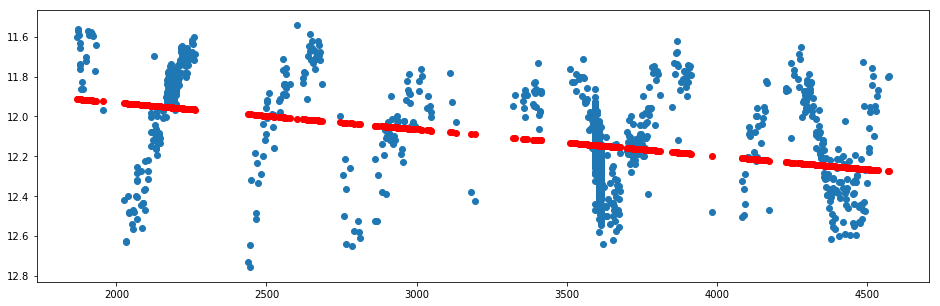

Vector error [  8.92784892e-06   3.11236569e-02]
Coeficientes estimados [  1.34073751e-04   1.16627175e+01]
Razon: [  15.01747537  374.72195269]
MSE: 0.0456666604379


In [74]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

y = aux["MAG_2"].drop(aux.index[outliers_index[0]]).values.ravel()
t = aux["HJD"].drop(aux.index[outliers_index[0]]).values.ravel()

def lineal_fit(t,a,b):
    m = a*t + b
    return m

popt, pcov = curve_fit(lineal_fit, t, y)
perr = np.sqrt(np.diag(pcov))
plt.figure(figsize=(16,5))
plt.gca().invert_yaxis()
plt.scatter(t,y)
plt.plot(t,lineal_fit(t,*popt), 'ro', label='fit')
plt.show()

y_hat = lineal_fit(t,*popt)
mse =  mean_squared_error(y, y_hat)
print("Vector error",perr)
print("Coeficientes estimados",popt)
print("Razon:",np.abs(popt/perr))
print("MSE:",mse)

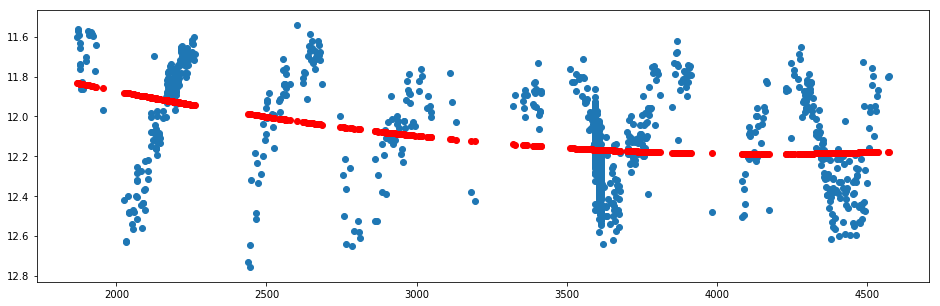

Vector error [  1.16227365e-01   7.50309064e-05   1.17531582e-08]
Coeficientes estimados [  1.10140809e+01   5.65251969e-04  -6.80127684e-08]
Razon: [ 94.76323278   7.53358845   5.78676534]
MSE: 0.0445015258999


In [75]:
def parabolic_fit(t,c,b,a):
    m = c+b*t+a*t**2
    return m

popt, pcov = curve_fit(parabolic_fit, t, y)
perr = np.sqrt(np.diag(pcov))
plt.figure(figsize=(16,5))
plt.gca().invert_yaxis()
plt.scatter(t,y)
plt.plot(t,parabolic_fit(t,*popt),'ro', label='fit')
plt.show()

y_hat = parabolic_fit(t,*popt)
mse =  mean_squared_error(y, y_hat)
print("Vector error",perr)
print("Coeficientes estimados",popt)
print("Razon:",np.abs(popt/perr))
print("MSE:",mse)

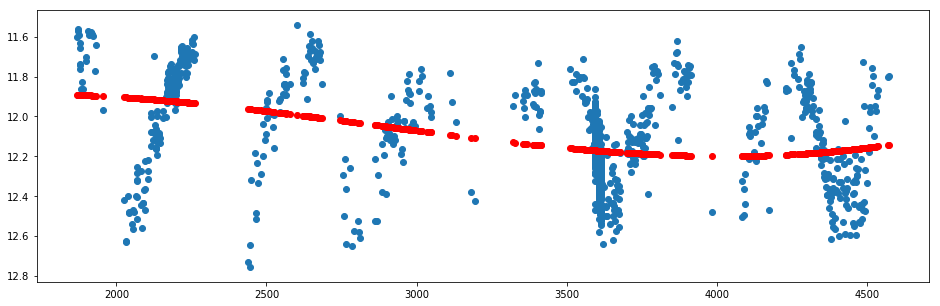

Vector error [  6.91923086e-01   6.70795085e-04   2.07840346e-07   2.07878639e-11]
Coeficientes estimados [  1.26005374e+01  -9.85096471e-04   4.14602068e-07  -4.83474737e-11]
Razon: [ 18.21089321   1.46855052   1.99481032   2.32575477]
MSE: 0.0443139662435


In [76]:
def otro_fit(t,d,c,b,a):
    m = t**3*a+b*t**2+c*t+d
    return m

popt, pcov = curve_fit(otro_fit, t, y)
perr = np.sqrt(np.diag(pcov))
plt.figure(figsize=(16,5))
plt.gca().invert_yaxis()
plt.scatter(t,y)
plt.plot(t,otro_fit(t,*popt),'ro', label='fit')
plt.show()

y_hat = otro_fit(t,*popt)
mse =  mean_squared_error(y, y_hat)
print("Vector error",perr)
print("Coeficientes estimados",popt)
print("Razon:",np.abs(popt/perr))
print("MSE:",mse)